In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [24]:
# Load dataset.
csv_file = 'Telco-Customer-Churn-Cleaned.csv'
df = pd.read_csv(csv_file)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


# Split Dataset for training

In [25]:
# Splitting the dataset into training and evaluation data
dftrain, dfeval = train_test_split(df, test_size=0.2)
print(len(dftrain), 'train examples')
print(len(dfeval), 'validation examples')

y_train = dftrain.pop('Churn')
y_eval = dfeval.pop('Churn')

5634 train examples
1409 validation examples


# Data Exploration

In [27]:
dftrain.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2603,Female,0,0,0,72,1,1,Fiber optic,1,1,1,1,1,1,Two year,1,Electronic check,114.90,8496.70
1909,Male,0,1,1,7,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,20.65,150.00
4268,Male,0,1,1,35,1,0,Fiber optic,0,1,0,1,1,0,One year,1,Electronic check,89.70,3165.60
2243,Female,1,1,0,66,1,1,Fiber optic,0,1,0,0,1,1,Month-to-month,1,Electronic check,100.80,6690.75
656,Male,0,1,1,68,1,1,DSL,1,1,1,1,1,1,Two year,1,Credit card (automatic),88.85,6132.70


In [28]:
dftrain.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.163649,0.484381,0.299432,32.556266,0.903798,0.424210,0.289315,0.349130,0.344693,0.290912,0.391374,0.386936,0.590877,64.861484,2296.978399
std,0.369990,0.499800,0.458050,24.621800,0.294894,0.494266,0.453485,0.476738,0.475310,0.454223,0.488101,0.487092,0.491716,30.139676,2275.579714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.662500,397.387500
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1399.825000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.887500,3847.387500
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000


## Gender breakdown

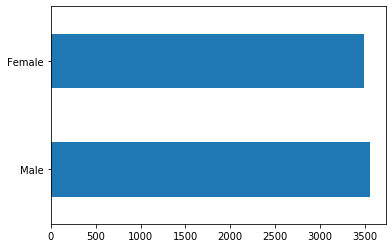

In [39]:
df['gender'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

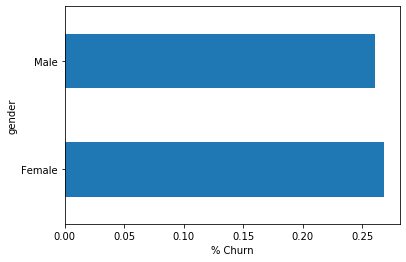

In [40]:
pd.concat([dftrain, y_train], axis=1).groupby('gender').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

### Females have an equal chance of churning versus males. This is clearly not a predictive feature for the model. 

## Contract Type Breakdown

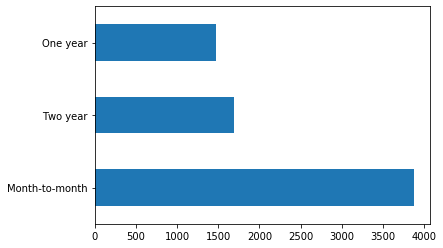

In [43]:
df['Contract'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

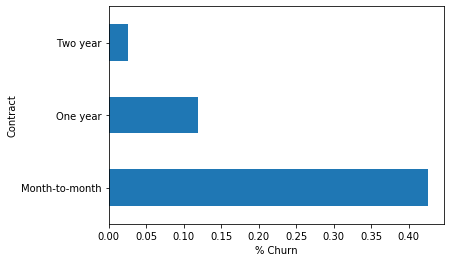

In [44]:
pd.concat([dftrain, y_train], axis=1).groupby('Contract').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

### Approximately half of the customer base is on a month-to-month contract. This category is a stong predictor of churn. 

### Actionable insight: promote one/two year contracts

## Internet Service Breakdown

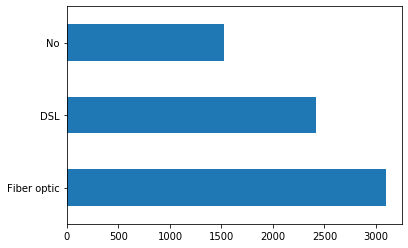

In [46]:
df['InternetService'].value_counts().plot(kind='barh')
plt.show()

Text(0.5, 0, '% Churn')

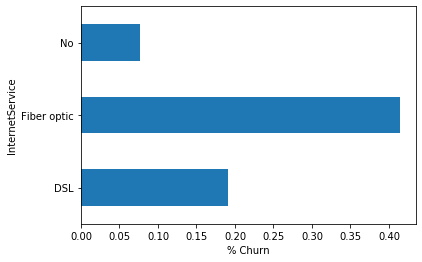

In [47]:
pd.concat([dftrain, y_train], axis=1).groupby('InternetService').Churn.mean().plot(kind='barh').set_xlabel('% Churn')

In [ ]:
### Most customers are using an 

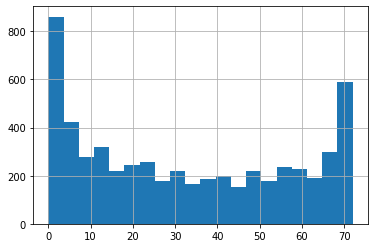

In [41]:
dftrain.tenure.hist(bins=20)

# Feature Selection
### Standard ML practice to reduce dimensionality in model 

In [8]:
# Check the correlation coefficient matrix 
# Remove columns with a value higher than 0.9 
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,-0.060625,0.105378,0.120176,0.156530,0.220173,0.103006,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,0.119999,0.124666,0.117412,-0.014877,0.096848,0.317504,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,0.063268,-0.016558,-0.039741,-0.111377,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,0.324221,0.279756,0.286111,0.006152,0.247900,0.826178,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,-0.096340,-0.022574,-0.032959,0.016505,0.247398,0.113214,0.011942
MultipleLines,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,0.100571,0.257152,0.258751,0.163530,0.490434,0.468504,0.040102
OnlineSecurity,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,0.354931,0.176207,0.187398,-0.003636,0.296594,0.411651,-0.171226
OnlineBackup,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,0.294233,0.282106,0.274501,0.126735,0.441780,0.509226,-0.082255
DeviceProtection,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,0.333313,0.390874,0.402111,0.103797,0.482692,0.521983,-0.066160
TechSupport,-0.060625,0.119999,0.063268,0.324221,-0.096340,0.100571,0.354931,0.294233,0.333313,1.000000,0.278070,0.279358,0.037880,0.338304,0.431883,-0.164674


In [4]:
# Inspect data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## TotalCharges column contains empty rows

In [5]:
df[['tenure','MonthlyCharges','TotalCharges']].sort_values(by='TotalCharges')

,tenure,MonthlyCharges,TotalCharges
936,0,80.85,
3826,0,25.35,
4380,0,20.00,
753,0,20.25,
5218,0,19.70,
...,...,...,...
6646,51,19.40,997.75
5598,55,19.15,998.1
3686,13,75.00,999.45
3353,12,85.05,999.8


In [6]:
# TotalCharges is only blank when tenure is 0
# => fill with 0 is sufficient, tenure * monthlycharges is unnecessary
# unify datatypes
df['TotalCharges'] = df['TotalCharges'].replace(r'^\s*$', np.nan, regex=True).fillna(0.0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

## Feature columns contain redundant data

In [7]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [8]:
# Reducing complexity of Yes/No columns with redundant data
# Relabel Yes/No columns to 1/0

tf_cols = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in tf_cols:
    df[col] = np.where(df[col] == 'Yes', 1, 0)

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
